78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


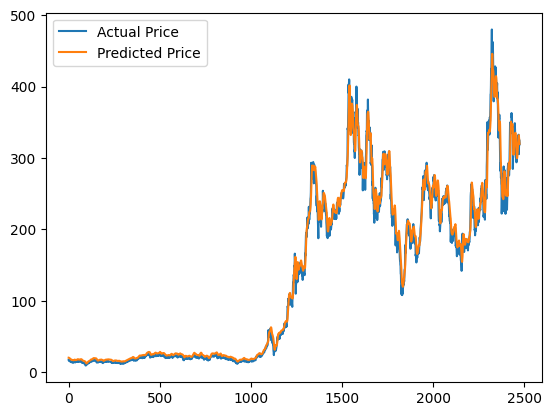

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Load the saved LSTM model
model = load_model('lstm model.h5')

# 2. Load your dataset (replace 'combined.csv' with your actual file)
df = pd.read_csv('combined_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 3. Select the relevant column, e.g., 'Close' prices for TSLA
data = df[['Close_TSLA']].values  # Adjust column name if needed

# 4. Scale the data using MinMaxScaler (same as training)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)  # Or use scaler from training if saved

# 5. Prepare input sequences (same way you prepared for training)
def create_sequences(data, seq_length=60):
    X = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
    return np.array(X)

seq_length = 60  # should match what you used before
X_test = create_sequences(scaled_data, seq_length)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 6. Predict using the loaded model
predictions = model.predict(X_test)

# 7. Inverse scale the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# 8. Plot predictions vs actual
plt.plot(data[seq_length:], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()

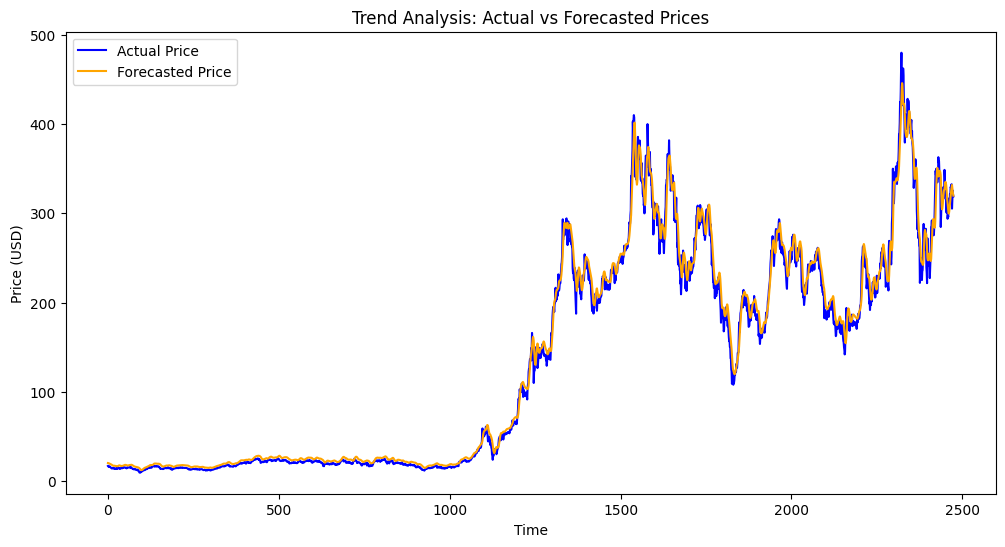

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data[seq_length:], label='Actual Price', color='blue')
plt.plot(predictions, label='Forecasted Price', color='orange')
plt.title('Trend Analysis: Actual vs Forecasted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

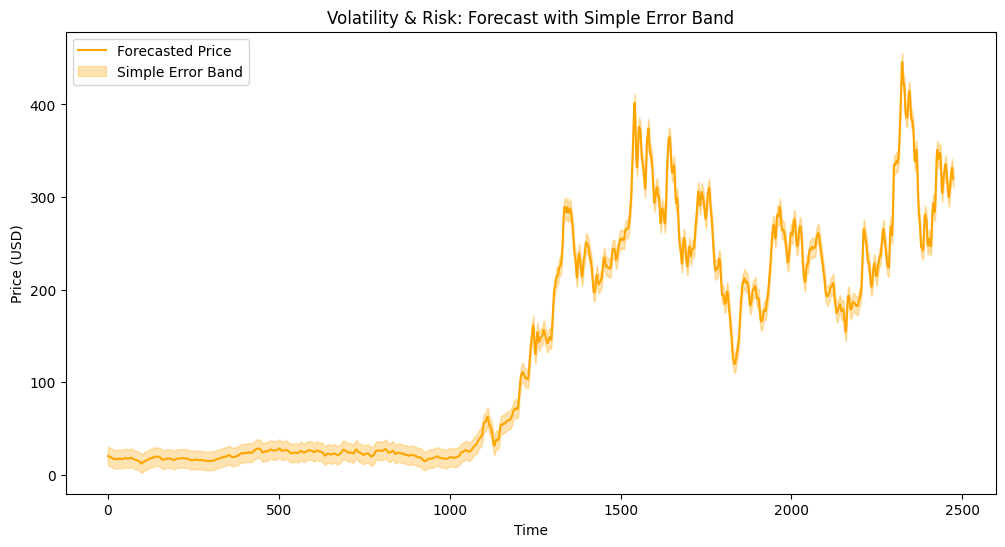

In [ ]:
error_margin = 10  # Example value, adjust based on your model's typical error

# Calculate a simple upper and lower bound
lower_bound = predictions - error_margin
upper_bound = predictions + error_margin

plt.figure(figsize=(12,6))
plt.plot(predictions, label='Forecasted Price', color='orange')
plt.fill_between(range(len(predictions)),
                 lower_bound.flatten(), # Use flatten() to ensure correct shape for fill_between
                 upper_bound.flatten(), # Use flatten() to ensure correct shape for fill_between
                 color='orange', alpha=0.3, label='Simple Error Band') # Changed label

plt.title('Volatility & Risk: Forecast with Simple Error Band') # Changed title
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

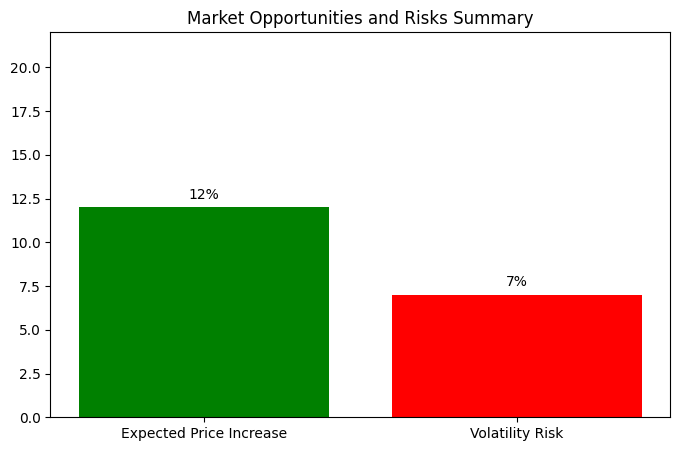

In [ ]:
import matplotlib.pyplot as plt

labels = ['Expected Price Increase', 'Volatility Risk']

expected_price_increase_percentage = 12  # Placeholder value

# TODO: Calculate volatility_risk_metric based on your predictions or other metrics.
# This could be, for example, the standard deviation of the predictions, the width of the confidence interval,
# or a metric derived from historical volatility.
volatility_risk_metric = 7  # Placeholder value

values = [expected_price_increase_percentage, volatility_risk_metric]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color=['green', 'red'])
plt.title('Market Opportunities and Risks Summary')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center')

plt.ylim(0, max(values) + 10)
plt.show()